In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import matplotlib.dates as dates
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
from Event import Event


In [21]:

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df
    
# also need to remove a number of columns that are simply irrelevant to the analysis or untested for a shareable dataset.

df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')


columns_to_keep = ['id', 'depth', 'relative_depth',
        'first_hydrophone', 'second_hydrophone',
       'arrival_time', 'first_arrival', 'second_arrival', 'dt',
       'max_amp', 'cum_amp', 'arrival_datetime', 'origin_time']

df141 = df141[columns_to_keep].copy()
df188 = df188[columns_to_keep].copy()
df197 = df197[columns_to_keep].copy()
df211 = df211[columns_to_keep].copy()

df141.sort_values(by='arrival_datetime', inplace=True)
df188.sort_values(by='arrival_datetime', inplace=True)
df197.sort_values(by='arrival_datetime', inplace=True)
df211.sort_values(by='arrival_datetime', inplace=True)

# # removing the events with maximum amplitude <0.1 since they are false positives
# df141 = df141[df141.max_amp > 0.5].copy()
# df188 = df188[df188.max_amp > 0.5].copy()
# df197 = df197[df197.max_amp > 0.5].copy()
# df211 = df211[df211.max_amp > 0.5].copy()

df141.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df188.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df197.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df211.drop_duplicates(subset=['arrival_datetime',], inplace=True)

df141 = df141[df141.depth > 160].copy()
df188 = df188[df188.depth > 160].copy()
df197 = df197[df197.depth > 160].copy()
df211 = df211[df211.depth > 160].copy()

In [22]:
# df211[df211.max_amp>100]

In [34]:
# paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=211)
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)

# loads data for all hydrophones
# converts to pascals
# flips the sign on hydrophone 3 if there it is borehole B due to wiring problem
waveforms = load.import_corrected_data_for_single_day(paths=paths)
print('loading data from:', paths)

loading data from: ['/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.01.GDH.2019.141', '/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.02.GDH.2019.141', '/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.03.GDH.2019.141', '/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.04.GDH.2019.141', '/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.05.GDH.2019.141', '/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.06.GDH.2019.141']


In [35]:
waveforms

6 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-21T00:00:04.958000Z - 2019-05-22T00:00:04.625000Z | 1000.0 Hz, 86399668 samples
7F.A00.02.GDH | 2019-05-21T00:00:02.689000Z - 2019-05-22T00:00:03.978000Z | 1000.0 Hz, 86401290 samples
7F.A00.03.GDH | 2019-05-21T00:00:00.991000Z - 2019-05-22T00:00:00.009000Z | 1000.0 Hz, 86399019 samples
7F.A00.04.GDH | 2019-05-21T00:00:00.295000Z - 2019-05-22T00:00:03.398000Z | 1000.0 Hz, 86403104 samples
7F.A00.05.GDH | 2019-05-21T00:00:00.964000Z - 2019-05-22T00:00:01.155000Z | 1000.0 Hz, 86400192 samples
7F.A00.06.GDH | 2019-05-21T00:00:01.824000Z - 2019-05-22T00:00:02.773000Z | 1000.0 Hz, 86400950 samples

<Axes: >

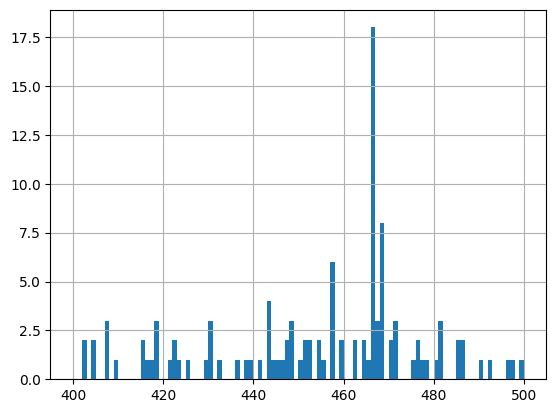

In [36]:
df141[df141.depth>400].depth.hist(bins=np.linspace(400, 500, 101))

In [37]:
df141[df141.depth.between(460, 470)]

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time
292,292,467.500,297.500,5,2,18037.324859,2019-05-21 07:47:47.776000+00:00,2019-05-21 07:47:47.876000+00:00,-0.100,0.234492,33.723739,2019-05-21 07:47:47.776000+00:00,2019-05-21T07:47:47.606000Z
298,298,468.375,298.375,3,2,18037.325010,2019-05-21 07:48:00.863000+00:00,2019-05-21 07:48:01.164000+00:00,-0.301,0.366232,50.194318,2019-05-21 07:48:00.863000+00:00,2019-05-21T07:48:00.692500Z
378,378,466.625,296.625,3,2,18037.326055,2019-05-21 07:49:31.176000+00:00,2019-05-21 07:49:31.475000+00:00,-0.299,0.454456,39.906892,2019-05-21 07:49:31.176000+00:00,2019-05-21T07:49:31.006500Z
416,416,462.250,292.250,5,2,18037.326276,2019-05-21 07:49:50.231000+00:00,2019-05-21 07:49:50.329000+00:00,-0.098,0.313670,22.078788,2019-05-21 07:49:50.231000+00:00,2019-05-21T07:49:50.064000Z
448,448,466.625,296.625,3,2,18037.326461,2019-05-21 07:50:06.193000+00:00,2019-05-21 07:50:06.492000+00:00,-0.299,0.482660,49.509398,2019-05-21 07:50:06.193000+00:00,2019-05-21T07:50:06.023500Z
475,475,464.000,224.000,5,3,18037.326598,2019-05-21 07:50:18.069000+00:00,2019-05-21 07:50:18.177000+00:00,-0.108,0.004414,35.142988,2019-05-21 07:50:18.069000+00:00,2019-05-21T07:50:17.941000Z
484,484,466.625,296.625,3,2,18037.326652,2019-05-21 07:50:22.736000+00:00,2019-05-21 07:50:23.035000+00:00,-0.299,1.137412,57.780353,2019-05-21 07:50:22.736000+00:00,2019-05-21T07:50:22.566500Z
502,502,467.500,297.500,3,2,18037.327208,2019-05-21 07:51:10.744000+00:00,2019-05-21 07:51:11.044000+00:00,-0.300,0.165315,59.305871,2019-05-21 07:51:10.744000+00:00,2019-05-21T07:51:10.574000Z
511,511,468.375,298.375,3,2,18037.327288,2019-05-21 07:51:17.640000+00:00,2019-05-21 07:51:17.941000+00:00,-0.301,0.775752,80.495436,2019-05-21 07:51:17.640000+00:00,2019-05-21T07:51:17.469500Z
520,520,466.625,296.625,3,2,18037.327355,2019-05-21 07:51:23.501000+00:00,2019-05-21 07:51:23.800000+00:00,-0.299,1.352950,62.073993,2019-05-21 07:51:23.501000+00:00,2019-05-21T07:51:23.331500Z


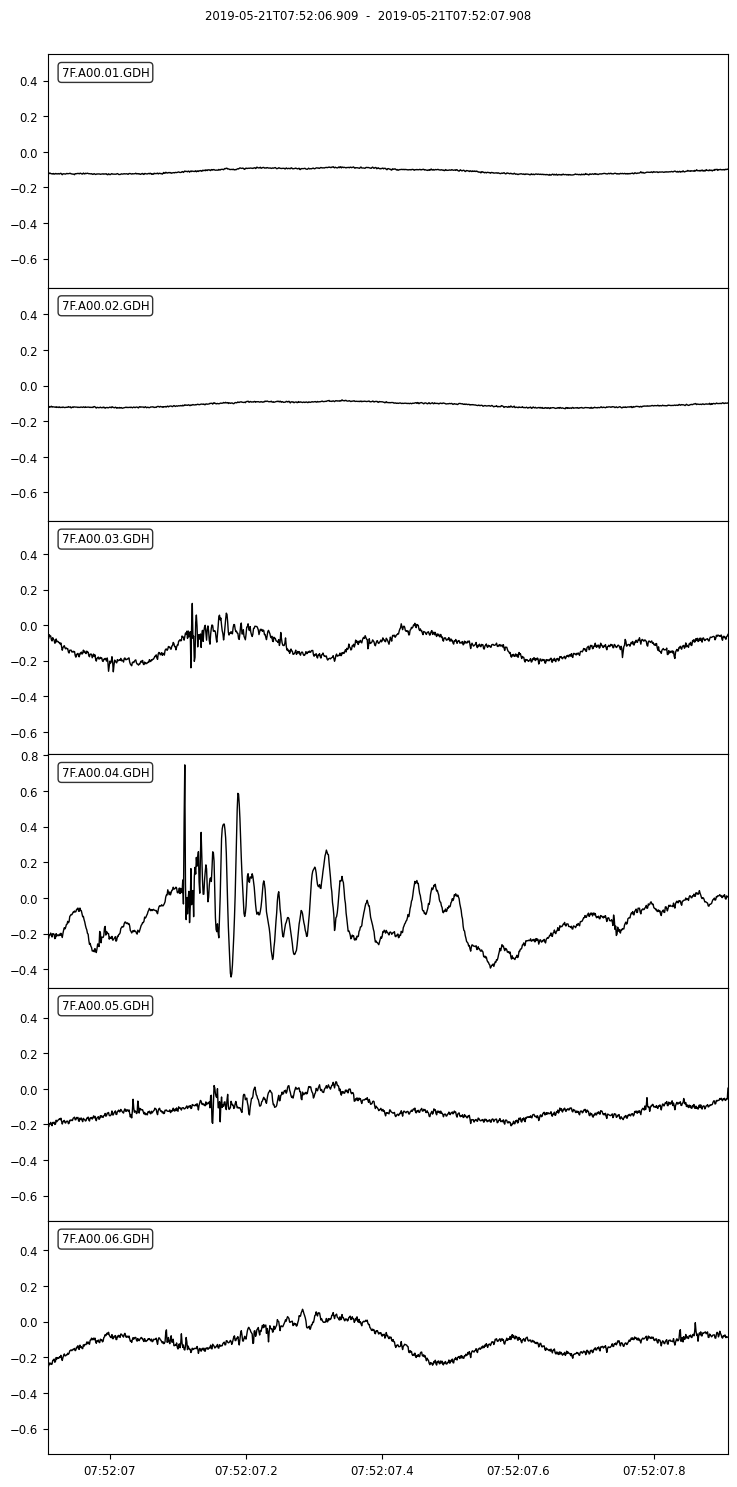

17.266816215636737

In [38]:
e = df141.loc[596]
waveforms.plot(
    starttime=obspy.UTCDateTime(pd.to_datetime(e.first_arrival))-0.2
    , endtime=obspy.UTCDateTime(pd.to_datetime(e.second_arrival))+0.5
                               )

waveforms[5].data.max()

In [16]:
# import obspy
# id = 98
# # df_picks_row = df211.loc[id]
# df_picks_row = df211[df211.id==id].loc[id]
# e = Event(id=id
#           , starttime=obspy.UTCDateTime(pd.to_datetime(df_picks_row.first_arrival))
#           , init_first_hphone=df_picks_row.first_hydrophone
#           , waveforms=waveforms.copy()
#           , velocity_model=1750
#          )
# e.data

TypeError: unsupported operand type(s) for *: 'UTCDateTime' and 'float'

In [16]:
df_picks_row.first_arrival

'2019-07-30 22:59:50.983999+00:00'

In [14]:
df211[df211.id==id].loc[300]

id                                                300
depth                                          378.25
relative_depth                                  68.25
first_hydrophone                                    5
second_hydrophone                                   4
arrival_time                             18107.958229
first_arrival        2019-07-30 22:59:50.983999+00:00
second_arrival       2019-07-30 22:59:51.021999+00:00
dt                                             -0.038
max_amp                                    170.523931
cum_amp                                    1199.04407
arrival_datetime     2019-07-30 22:59:50.983999+00:00
origin_time               2019-07-30T22:59:50.944999Z
Name: 300, dtype: object